# MTCS 104(P): HCI1 SE-3
<br>*Practicals: Digital Image Processing*
<br>*I MTech CS*
<br>*Regd no: 22555*
<br>*Date of submission: 20/11/2022*
<br>
<br>*Task:*
<br>*Compare and contrast the performance of any two color image enhancement techniques using three
metrics. One of these enhancement procedures should involve color histogram. One of the metrics
should be perception based and one should be structure based (like ssim).*

In [371]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

# Metrics

RMSE: Root Mean Square Error
<br>Reference: https://www.scirp.org/journal/paperinformation.aspx?paperid=90911

In [372]:
def RMSE(Before, After):
    Before = Before.astype(np.float64)
    After = After.astype(np.float64)
   
    # Finding the mean square error
    mse = np.mean((After - Before)**2)

    return math.sqrt(mse)

PSNR: Peak Signal-to-Noise Ratio
<br>Reference: https://cvnote.ddlee.cc/2019/09/12/psnr-ssim-python

In [373]:
def PSNR(Before, After):
    Before = Before.astype(np.float64)
    After = After.astype(np.float64)
   
    # Finding the mean square error
    mse = np.mean((After - Before)**2)

    return 20*math.log10(255/math.sqrt(mse))

SSIM: Structural Similarity Index Measure
<br>Reference: https://en.wikipedia.org/wiki/Structural_similarity

In [374]:
def SSIM(Before, After):
    # Finding the mean
    m1 = Before.mean(axis = (0,1))
    m2 = After.mean(axis = (0,1))

    # Finding the variance
    v1 = np.var(Before, axis = (0,1))
    v2 = np.var(After, axis = (0,1)) 

    MN = Before.shape[0]*Before.shape[1]

    # Covariance of Before and After images
    cv = np.sum((Before - m1)*(After - m2)/(MN - 1),axis=(0,1))

    k1, k2 = 0.01, 0.03
    L = 256

    c1 = (k1*L)**2
    c2 = (k2*L)**2

    # Calculating ssim
    ssim = ((2*m1*m2 + c1)*(2*cv + c2))/((m1**2 + m2**2 + c1)*(v1**2 + v2**2 + c2))

    return ssim


# Contrast Stretching

References: http://www.dspmuranchi.ac.in/pdf/Blog/Contrast%20Enhancement.pdf

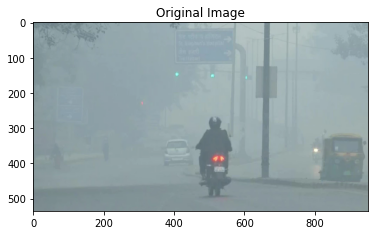

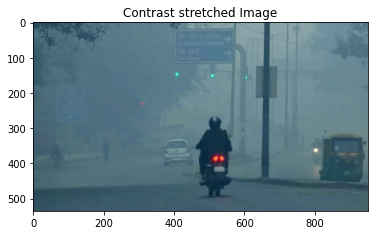

In [375]:
# Reading an image
image = cv2.imread('Haze.jpg')
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Finding min and max
img_min = img.min(axis=(0,1))
img_max = img.max(axis=(0,1))

# Contrast stretching
contrast_stretched_img = ((255/(img_max-img_min))*(img - img_min)).astype(dtype = np.uint8)

plt.title("Original Image")
plt.show(plt.imshow(img))

plt.title("Contrast stretched Image")
plt.show(plt.imshow(contrast_stretched_img))

RMSE:

In [376]:
rmse = RMSE(img, contrast_stretched_img)
print(rmse)

50.5031791445633


PSNR: Peak Signal-to-Noise Ratio

In [377]:
psnr = PSNR(img,contrast_stretched_img)
print(psnr)

14.064429257599556


SSIM:

In [378]:
ssim = SSIM(img, contrast_stretched_img)
ssim_mean = ssim.mean()
print(ssim_mean)

0.002099471523668468


# Histogram Equalization


Reference: https://en.wikipedia.org/wiki/Histogram_equalization

In [379]:
# Reading an image
image = cv2.imread('diwali.jpg')

In [380]:
# cumulative distribution function for histogram equalization 
def CDF(img):
    # Histogram of the given image
    hist,bins = np.histogram(img.flatten(),bins = 256)

    # Cumulative sum
    cdf = hist.cumsum()

    # Cumulative distribution function minimum
    cdf_min = cdf.min()
        
    M = img.shape[0]*img.shape[1]

    cdf_equalization = 255*(cdf - cdf_min)/(M - cdf_min)
    
    return cdf_equalization[img]


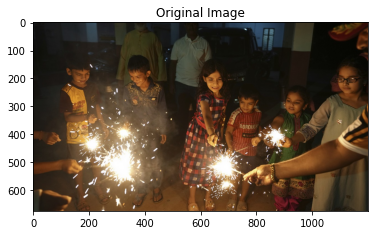

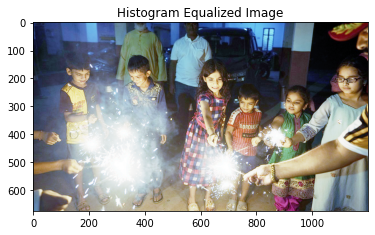

In [381]:
# Spliting the channels
b,g,r = cv2.split(image)

# Applying histogram equalization to each of the 3 channels
hist_equalization_b = CDF(b)
hist_equalization_g = CDF(g)
hist_equalization_r = CDF(r)

# Merging the 3 channels after equalizing
merge_img = (cv2.merge([hist_equalization_b,hist_equalization_g,hist_equalization_r])).astype(dtype = np.uint8)

# Converting the images from BGR to RGB
img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
final_img = cv2.cvtColor(merge_img, cv2.COLOR_BGR2RGB)

# Displaying the Before and After images
plt.title("Original Image")
plt.show(plt.imshow(img))

plt.title("Histogram Equalized Image")
plt.show(plt.imshow(final_img))


RMSE

In [382]:
rmse = RMSE(img, final_img)
print(rmse)

80.10136852455253


PSNR:

In [383]:
psnr = PSNR(img,final_img)
print(psnr)

10.058004888096887


SSIM:

In [384]:
ssim = SSIM(img, final_img)
ssim_mean = ssim.mean()
print(ssim_mean)

0.00013589469344430218
